# Week 5 exercises - solutions

In [1]:
import numpy as np
import pandas as pd
import plotnine as p9
import scipy as sp

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
# read in metabric dataset
metabric = pd.read_csv("../data/metabric_clinical_and_expression_data.csv").dropna()
metabric.dtypes

Patient_ID                        object
Cohort                             int64
Age_at_diagnosis                 float64
Survival_time                    float64
Survival_status                   object
Vital_status                      object
Chemotherapy                      object
Radiotherapy                      object
Tumour_size                      float64
Tumour_stage                     float64
Neoplasm_histologic_grade        float64
Lymph_nodes_examined_positive      int64
Lymph_node_status                  int64
Cancer_type                       object
ER_status                         object
PR_status                         object
HER2_status                       object
HER2_status_measured_by_SNP6      object
PAM50                             object
3-gene_classifier                 object
Nottingham_prognostic_index      float64
Cellularity                       object
Integrative_cluster               object
Mutation_count                   float64
ESR1            

## Exercise 1
Is there a significant difference between the tumour size of patients who received chemotherapy versus patients that did not receive chemotherapy? Use either the t-test or Mann-Whitney U test, and provide a visualization to compare tumour size between patients who did or did not receive chemotherapy. When deciding which test to use, remember to check whether the data is normally distributed or not.

Median tumour size for patients who received chemotherapy = 26.0
Median tumour size for patients who did not receive chemotherapy = 21.0
KS test on tumour size for patients who received chemotherapy:
stat = 0.995934940360031, p = 0.0
KS test on tumour size for patients who did not receive chemotherapy:
stat = 0.9919999990134123, p = 0.0
Mann-Whitney U test of tumour size:
f = 73598.0, p = 1.4603021660333743e-14


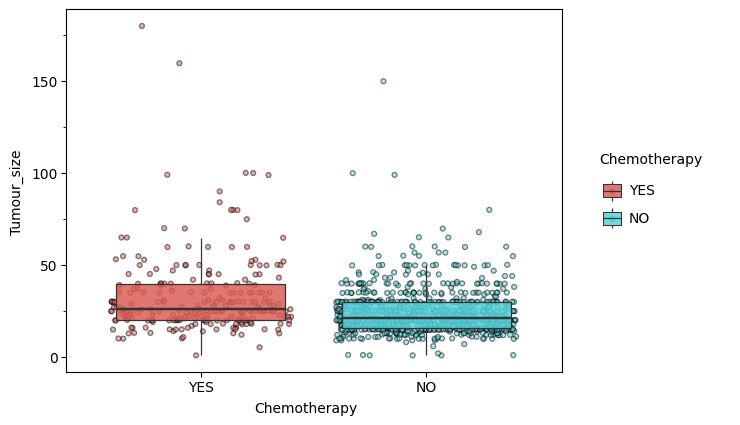

<ggplot: (-9223372036569094319)>


In [5]:
# split the patients into those who did or did not receive chemotherapy
chemo_yes = metabric[metabric["Chemotherapy"]=="YES"]
chemo_no = metabric[metabric["Chemotherapy"]=="NO"]
# print out median tumour size for each patient set
print("Median tumour size for patients who received chemotherapy = {}".format(chemo_yes["Tumour_size"].median()))
print("Median tumour size for patients who did not receive chemotherapy = {}".format(chemo_no["Tumour_size"].median()))

# run the Kolmogorov-Smirnov test on tumour size for each patient set
chemo_yes_ks = sp.stats.kstest(chemo_yes["Tumour_size"], "norm")
chemo_no_ks = sp.stats.kstest(chemo_no["Tumour_size"], "norm")
# print the results
print("KS test on tumour size for patients who received chemotherapy:")
print("stat = {}, p = {}".format(chemo_yes_ks.statistic, chemo_yes_ks.pvalue))
print("KS test on tumour size for patients who did not receive chemotherapy:")
print("stat = {}, p = {}".format(chemo_no_ks.statistic, chemo_no_ks.pvalue))

# run the Mann-Whitney U test to compare tumour size between patients that did or did not receive chemotherapy
tumour_size_MWU = sp.stats.mannwhitneyu(chemo_yes["Tumour_size"], chemo_no["Tumour_size"])
# print the results
print("Mann-Whitney U test of tumour size:")
print("f = {}, p = {}".format(tumour_size_MWU.statistic, tumour_size_MWU.pvalue))

# respecify the Chemotherapy column in the metabric dataset as an pandas Categorical variable
# this allows us to set the order of the X axis and legend items when plotting from this data in the next step, overriding the default alphabetical ordering
# for R users: this is equivalent to specifying the levels of a factor
metabric["Chemotherapy"] = pd.Categorical(metabric["Chemotherapy"], categories=["YES", "NO"])
# plot tumour size for patients that did or did not receive chemotherapy
tumour_size_boxplot = (
# specify Chemotherapy as the x axis variable to split the data up into patients that did or did not receive chemotherapy
# specify Chemotherapy as the fill argument to ensure that plot elements are coloured by Chemotherapy group
p9.ggplot(metabric, p9.aes("Chemotherapy", "Tumour_size", fill="Chemotherapy"))
    # specify the matplotlib theme
    + p9.theme_matplotlib()
    # add jittered points in the first layer to see the underlying raw data
    + p9.geom_jitter(alpha=0.5)
    # add boxplots to see the overall difference, set the transparency at 0.75, and turn off plotting of outliers
    + p9.geom_boxplot(alpha=0.85, outlier_shape="")
)
print(tumour_size_boxplot)

## Exercise 2
Is there a correlation between tumour size and survival time? If so, does the correlation become weaker or stronger after tumour size is log10-transformed? Generate a visualization of the relationship between log10-transformed tumour size and survival time.

Spearman correlation between tumour size and survival time:
coefficient = -0.23236260510774726, p value = 3.294337572424616e-15
Spearman correlation between transformed tumour size and survival time:
coefficient = -0.24739531461899886, p value = 4.283251550701904e-17


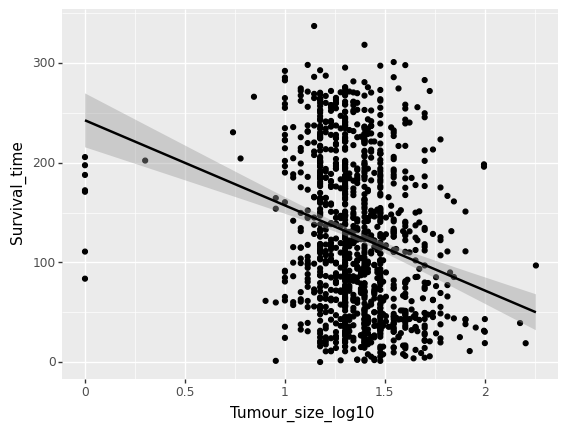

<ggplot: (285681942)>


In [6]:
# test correlation between tumour size and survival time
tumour_size_survival_time_corr = sp.stats.pearsonr(metabric["Tumour_size"], metabric["Survival_time"])
print("Spearman correlation between tumour size and survival time:")
print("coefficient = {}, p value = {}".format(tumour_size_survival_time_corr[0], tumour_size_survival_time_corr[1]))

# log10-transform tumour size
metabric["Tumour_size_log10"] = np.log10(metabric["Tumour_size"])
# test correlation between transformed tumour size and survival time
tumour_size_log10_survival_time_corr = sp.stats.pearsonr(metabric["Tumour_size_log10"], metabric["Survival_time"])
print("Spearman correlation between transformed tumour size and survival time:")
print("coefficient = {}, p value = {}".format(tumour_size_log10_survival_time_corr[0], tumour_size_log10_survival_time_corr[1]))

tumour_size_log10_survival_time_scatter = (
p9.ggplot(metabric, p9.aes("Tumour_size_log10", "Survival_time"))
    + p9.geom_point()
    + p9.geom_smooth()
)
print(tumour_size_log10_survival_time_scatter)

## Exercise 3
Make a contingency table of the number of patients that did or did not receive chemotherapy and did or did not receive radiotherapy, and use a chi-square test to investigate whether the incidence of these treatments are independent of each other.

In [8]:
# make contingency table
contingency_table = pd.crosstab(metabric["Chemotherapy"], metabric["Radiotherapy"])
print(contingency_table)
# compute chi-square test
chemo_radio_chi2 = sp.stats.chi2_contingency(contingency_table)
# print results
print("Chi-square test of chemotherapy and radiotherapy:")
print("Chi-square value = {}, p value = {}".format(chemo_radio_chi2[0], chemo_radio_chi2[1]))

Radiotherapy   NO  YES
Chemotherapy          
YES            37  209
NO            348  527
Chi-square test of chemotherapy and radiotherapy:
Chi-square value = 50.990793721668986, p value = 9.280019569506365e-13
